In [1]:
## Background information

## Data is from an online clearinghouse for wholesale diamond industry

## 300+ jewelers use the database and online marketplace to purchase and sell diamonds
## A dealer wishing to sell a diamond posts its asking price and physical characteristics looks at the database
## Prospective buyers contact the seller directly and dealers pay a fee to have their diamonds listed on the database

## Further Background Research
## Diving into this assignment, I have conducted done some domain research by using web sources
## Later, while personally shopping for a wedding ring, I got to talk to more industry people 
## This allowed me to understand a bit more about this dataset and the numbers 
## Further background information to be explained during the EDA process

# Diamond colors are graded from D(colorless) to Z(yellowish/tinted)


In [2]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics


# also import sklearn 

In [3]:
# Loading the data

diamond_df = pd.read_csv("Diamonds2.csv")

In [4]:
# Looking at the data

diamond_df.head()



,Carat,Clarity,Color,Depth,Table,Price,Lab,Dealer
0,1.34,SI2,H,62.099998,60.0,8276.1750,J,224
1,1.06,SI2,I,60.200001,61.0,5075.8100,D,224
2,1.00,VS2,F,64.800003,64.0,7686.0000,D,224
3,1.18,SI1,G,61.599998,63.0,8421.6600,J,224
4,1.06,SI1,I,62.500000,63.0,5665.8325,D,224


In [5]:
diamond_df.shape

(22746, 8)

In [6]:
## Starting Exploratory Data Analysis with univariate EDA


In [7]:
## First lets rearrange the dataframe by placing hte response variable "Price" in the begginning

diamond_df = diamond_df[["Price", "Carat", "Clarity", "Color", "Depth", "Table", "Lab", "Dealer"]]


In [8]:
# Price Variable

print(diamond_df["Price"])



0        8276.1750
1        5075.8100
2        7686.0000
3        8421.6600
4        5665.8325
           ...    
22741    2058.7500
22742    3149.8875
22743    2379.0000
22744    2885.4525
22745    2407.2125
Name: Price, Length: 22746, dtype: float64


In [9]:
totalMissingPrice = diamond_df["Price"].isna().sum()

print(totalMissingPrice)

# No missing data 

0


In [10]:
diamond_df["Price"].describe()

# Minimum price for a diamond in the dataset was $8.61 
# Maximum price was $181,124 
# Mean price for a diamond in the dataset was $9196
# Median price of diamonds is $6668   

count     22746.000000
mean       9196.497881
std        9035.446678
min           8.616250
25%        3971.100000
50%        6668.062500
75%       10703.670000
max      181124.250000
Name: Price, dtype: float64

C:\Users\baryi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

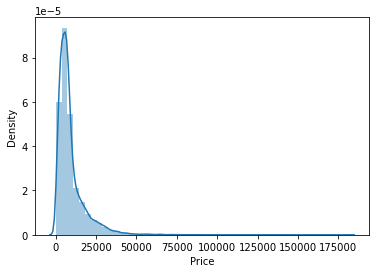

In [11]:
sns.distplot(diamond_df["Price"])

# Unimodal
# Data does not look normally distributed
# Price data looks right-skewed, transformation might be needed


In [12]:
# Looking at the columns again

for col in diamond_df:
    print(col)

Price
Carat
Clarity
Color
Depth
Table
Lab
Dealer


In [13]:
# Carat Variable


diamond_df["Carat"].describe()

# Median value of 1.03
# Mean value of 1.17
# Max value of 3.99
# Min value of 0.3

count    22746.000000
mean         1.171627
std          0.592141
min          0.300000
25%          0.750000
50%          1.030000
75%          1.500000
max          3.990000
Name: Carat, dtype: float64

In [14]:
diamond_df["Carat"].isna().sum()

0

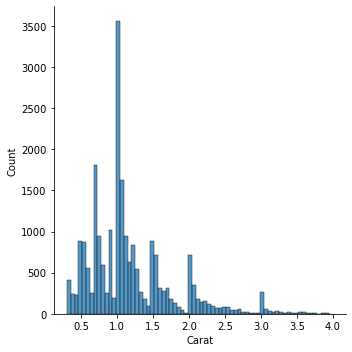

In [15]:
sns.displot(diamond_df["Carat"])

# Not normally distributed, right skewed
# Might need transformations for normalizing the variable for modelling

In [16]:
# clarity Variable

# Re-visiting the backgroun knowledge regarding the variable
#  Background research

# Meaning of different categories for clarity
# IF – Internally flawless, slight external blemishes are allowed
# VVS1 – Very, very slightly
# VVS2 – Slightly lower grade than VVS1 
# VS1 and VS2 – Very slightly included
# SI – Slightly included – SI1 and SI2 
# I1 - Imperfect

# Expectation of decreasing implied value going down from IF to I1 


In [17]:
diamond_df["Clarity"].unique()

# All 7 categories present in data set


array(['SI2', 'VS2', 'SI1', 'VVS2', 'I1', 'VS1', 'IF'], dtype=object)

In [18]:
diamond_df["Clarity"].value_counts()

SI1     6310
VS2     5408
SI2     4733
VS1     3868
VVS2    1237
I1       799
IF       391
Name: Clarity, dtype: int64

In [19]:
avgPriceClarity = diamond_df[["Price","Clarity"]]

avgPriceClarity.groupby("Clarity").mean()

# As expected, on average IF(internally flawless) diamonds command the highest mean price
# Followed by VS1, VS2, VS3, S1, S2, I1 respectively  


,Price
Clarity,
I1,4817.474714
IF,18356.129400
SI1,8832.855509
SI2,7866.146990
VS1,10207.688257
VS2,9899.706243
VVS2,9838.634116


In [20]:
diamond_df["Color"].unique()

array(['H', 'I', 'F', 'G', 'J', 'E', 'D', 'K'], dtype=object)

In [21]:
len(diamond_df["Color"].unique())


# 8 unique color categories
# Diamond colors are graded from D(colorless) to Z(yellowish/tinted)


8

In [22]:
avgPriceColor = diamond_df[["Price","Color"]]

avgPriceColor.groupby("Color").mean()


# This Letter-grading system assues an increasing tinted-ness in color from D to Z
# On average, it looks like there is some relationship between the price and tinted quality but not consistently 


,Price
Color,
D,10927.002829
E,8967.841971
F,8858.661111
G,9497.158305
H,9116.632328
I,9186.428248
J,8741.009376
K,8439.617637


In [23]:
avgPriceColor.groupby("Color").count()

,Price
Color,
D,1373
E,3063
F,3753
G,4403
H,4854
I,2938
J,1571
K,791


Text(0, 0.5, 'Price')

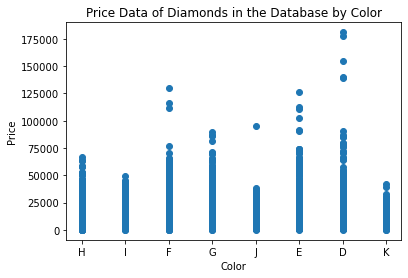

In [24]:
plt.title("Price Data of Diamonds in the Database by Color")
plt.scatter(diamond_df["Color"], diamond_df["Price"])
plt.xlabel("Color")
plt.ylabel("Price")

In [25]:
diamond_df[["Price", "Color"]].groupby("Color").count()

#There are good enough distribution of observations across different color categories

,Price
Color,
D,1373
E,3063
F,3753
G,4403
H,4854
I,2938
J,1571
K,791


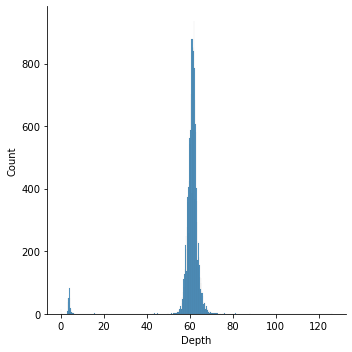

In [26]:
sns.displot(diamond_df["Depth"])

# Distribution looks problematic for a variable which is supposed to represent the total depth to total width of a diamond
# Per background research, around 60 is represented as close to ideal for a diamond
# Representationg of extreme value in the distribution cause concern
# Such extreme values are mostly likely erroneous 

In [27]:
diamond_df["Depth"].describe()

count    19523.000000
mean        60.224700
std          8.335902
min          0.000000
25%         60.000000
50%         61.299999
75%         62.500000
max        126.282997
Name: Depth, dtype: float64

C:\Users\baryi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Depth'>

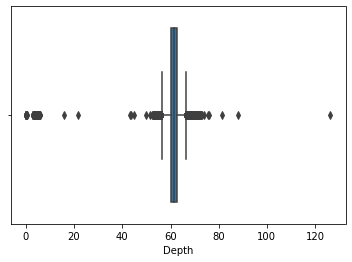

In [28]:
sns.boxplot(diamond_df["Depth"])

## Lots of outliers and extreme values

In [29]:
diamond_df[diamond_df["Depth"]==0].count()

Price      15
Carat      15
Clarity    15
Color      15
Depth      15
Table      15
Lab        15
Dealer     15
dtype: int64

In [30]:
total_missing = diamond_df["Depth"].isna().sum()
total_count = diamond_df.shape

print("Total number of missing values :" + str(total_missing))

print("Shape of the df "+ str(total_count))
      

## ~15% of the values missing
## 15 counted "0" values
      

Total number of missing values :3223
Shape of the df (22746, 8)


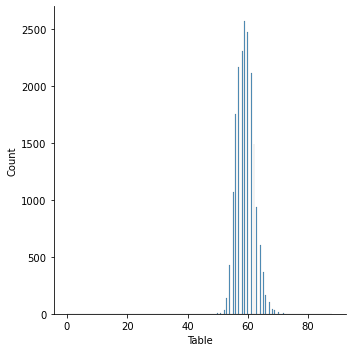

In [31]:
sns.displot(diamond_df["Table"])

In [32]:
diamond_df["Table"].describe()

count    18868.000000
mean        59.180729
std          2.985644
min          0.000000
25%         57.000000
50%         59.000000
75%         61.000000
max         88.000000
Name: Table, dtype: float64

In [33]:
diamond_df["Table"].isna().sum()

# Again lots of values missing for the Table variable too
# Outliers and extreme values most likely erroneous as the variable represents the 

3878

In [34]:
# Looking at the lab variable

diamond_df.Lab.describe()

count     22746
unique       13
top           J
freq      13560
Name: Lab, dtype: object

In [35]:
diamond_df["Lab"].head()

0    J
1    D
2    D
3    J
4    D
Name: Lab, dtype: object

<AxesSubplot:xlabel='Lab', ylabel='Price'>

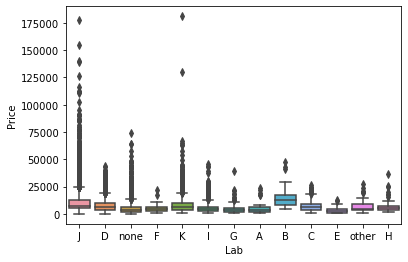

In [36]:
sns.boxplot(x="Lab", y="Price", data=diamond_df)

In [37]:
diamond_df[["Price", "Lab"]].groupby("Lab").mean()


# 13 different categories which all seem to differ in their mean values
# A lot more varince for the lab J compared to other labs

,Price
Lab,
A,5213.280981
B,14895.854775
C,7311.310054
D,7902.754118
E,3493.727344
F,5060.398897
G,4940.279626
H,7431.390986
I,5550.926027


In [38]:
# Dealer variable

diamond_df["Dealer"].describe()


count    22746.000000
mean       116.661259
std         73.828966
min          1.000000
25%         51.000000
50%        120.000000
75%        186.000000
max        237.000000
Name: Dealer, dtype: float64

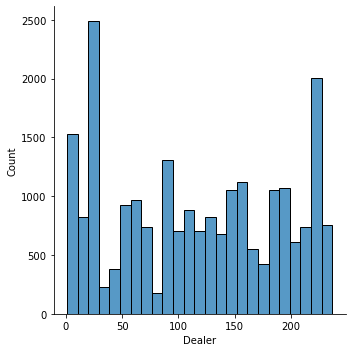

In [39]:
sns.displot(diamond_df["Dealer"])

<AxesSubplot:xlabel='Dealer', ylabel='Price'>

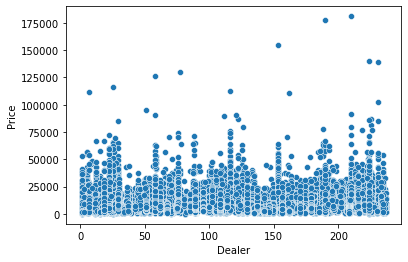

In [40]:
sns.scatterplot(x="Dealer", y="Price", data=diamond_df)

# Hundreds of dealers coded as a numerical variable
# Even if converted into categorical, there would be limited observations per category leading to overfitting 

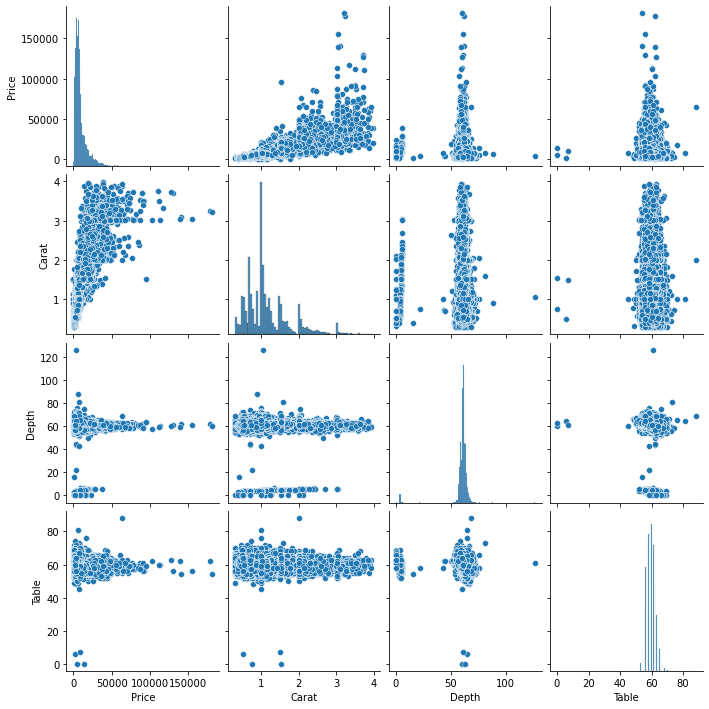

In [41]:
# Continuing with multivariate EDA

sns.pairplot(diamond_df[["Price", "Carat", "Depth", "Table"]])





C:\Users\baryi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Carat', ylabel='Price'>

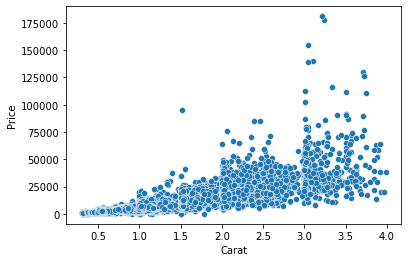

In [42]:
# There seems to be a linear relationship between the carat variable and the Price
# Exploring the relationship for modelling linear regression
 
sns.scatterplot("Carat", "Price", data=diamond_df)

In [43]:
diamond_df["logPrice"] = np.log(diamond_df["Price"])

In [44]:
diamond_df["logCarat"] = np.log(diamond_df["Carat"])

C:\Users\baryi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='logCarat', ylabel='logPrice'>

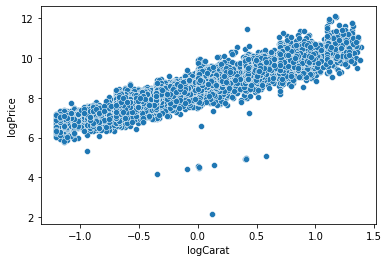

In [45]:
# Exploring the benefit of log transformation to deal with the skewness in both variables


sns.scatterplot("logCarat", "logPrice", data=diamond_df)

<AxesSubplot:>

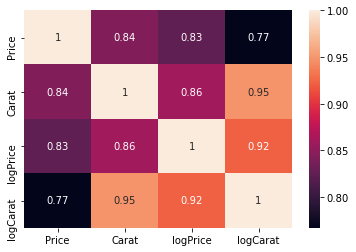

In [46]:
corrMat = diamond_df[["Price", "Carat", "logPrice", "logCarat"]].corr()

sns.heatmap(corrMat, annot=True)

# Transformations seem to improve the correlation between the Price and Carat
# Establishes better Linear relationship

<AxesSubplot:xlabel='Depth', ylabel='Price'>

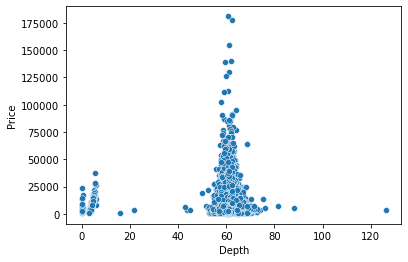

In [47]:
# Looking back at the Depth variable

sns.scatterplot(x="Depth", y="Price", data=diamond_df)

# The values which are far away from the ideal value of 60 are almost certainly erroneous because of the physical shape of diamonds
# The deletion of the values would improve the integrity of the data


In [48]:
# Deleting observations which have a value less than 40 and above 60 to be deleted

<AxesSubplot:xlabel='Table', ylabel='Price'>

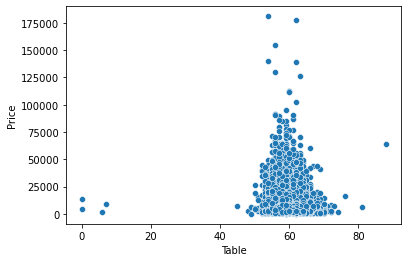

In [49]:
# Looking at the Table variable again

sns.scatterplot(x="Table", y="Price", data=diamond_df)

# Alongside the Depth variable, observations for Table variable where the values go below and exceed 40 and 80 respectively will be discarded


In [50]:
# Removing the extreme erroneous observations

diamond_df.drop(diamond_df[(diamond_df["Depth"]>80) | (diamond_df["Depth"]<40) | (diamond_df["Table"]>80) | (diamond_df["Table"]<40)].index, inplace=True)


<AxesSubplot:xlabel='Table', ylabel='Price'>

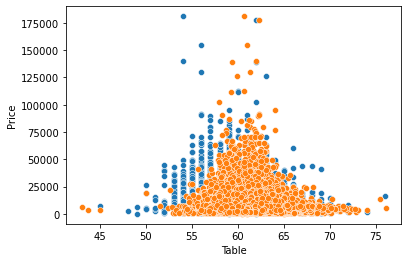

In [51]:
sns.scatterplot(x="Table", y="Price", data=diamond_df)

sns.scatterplot(x="Depth", y="Price", data=diamond_df)


In [52]:
print(str(diamond_df["Table"].isna().sum()))
print(str(diamond_df["Depth"].isna().sum()))



3677
3223


In [53]:
# Dealing with the missing values for Depth and Table variables
# 10-15% of values for Table and Depth variables missing
# Given that a very large proportion of data points are missing, deleting them could lead to a significant loss of information
# Will impute the mean for the missing values

meanTable = diamond_df["Table"].mean()
meanDepth = diamond_df["Depth"].mean()

diamond_df["TableFill"] = diamond_df["Table"].fillna(meanTable)
diamond_df["DepthFill"] = diamond_df["Depth"].fillna(meanDepth)



In [54]:
print(str(diamond_df["TableFill"].isna().sum()))
print(str(diamond_df["DepthFill"].isna().sum()))


0
0


In [55]:
# Building a model
# Establishing training and testing sets
from sklearn.model_selection import train_test_split

X = diamond_df[["logCarat", "TableFill", "DepthFill", "Clarity", "Color", "Lab"]]

y = diamond_df[["logPrice"]]

X = pd.get_dummies(data=X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)





In [56]:
X.isna().sum()

logCarat        0
TableFill       0
DepthFill       0
Clarity_IF      0
Clarity_SI1     0
Clarity_SI2     0
Clarity_VS1     0
Clarity_VS2     0
Clarity_VVS2    0
Color_E         0
Color_F         0
Color_G         0
Color_H         0
Color_I         0
Color_J         0
Color_K         0
Lab_B           0
Lab_C           0
Lab_D           0
Lab_E           0
Lab_F           0
Lab_G           0
Lab_H           0
Lab_I           0
Lab_J           0
Lab_K           0
Lab_none        0
Lab_other       0
dtype: int64

In [57]:
y.isna().sum()

logPrice    0
dtype: int64

In [58]:
mod = linear_model.LinearRegression()

In [59]:
mod.fit(X, y)

LinearRegression()

In [60]:
# regression coefficients


for col in X.columns:
    print(col)

# regression coefficients
print('Coefficients are: ', mod.coef_)


# variance score
print('Variance score is '+ str((mod.score(X_test, y_test))))

logCarat
TableFill
DepthFill
Clarity_IF
Clarity_SI1
Clarity_SI2
Clarity_VS1
Clarity_VS2
Clarity_VVS2
Color_E
Color_F
Color_G
Color_H
Color_I
Color_J
Color_K
Lab_B
Lab_C
Lab_D
Lab_E
Lab_F
Lab_G
Lab_H
Lab_I
Lab_J
Lab_K
Lab_none
Lab_other
Coefficients are:  [[ 1.73894348 -0.00559965 -0.00542057  1.04512976  0.64862967  0.49661515
   0.8144297   0.75149502  0.86415084 -0.06084074 -0.13058277 -0.19412457
  -0.2975079  -0.44939515 -0.60575483 -0.72832384  0.12833371 -0.03705979
   0.01955815 -0.11565134  0.07139546  0.02656323  0.05926913  0.00393829
   0.14818349  0.24602969  0.02376261 -0.17945972]]
Variance score is 0.9576993729712415
